<a href="https://colab.research.google.com/github/OmdenaAI/munich-chapter-credit-card-fraud/blob/main/src/docs/Data_Wrangling/Data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **1. Importing Liabraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### **2. Loading Datasets**

In [ ]:
Test_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/fraudTest.csv",index_col=0)
Test_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
Train_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/fraudTrain.csv",index_col=0)
Train_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


### **3. Validating Datasets**

The file is already split between **train** and **test** datasets, we will learn from the given train data and validate our learnings from the test data.

But first we validate that are both file really Train and Test files.

    1. First we will check that both datasets have same column names    
    2. We will check the % in which both files are divided.

In [ ]:
all(Train_data.columns==Test_data.columns)
# Both Datasets have same column names

True

In [ ]:
length_of_train_data=len(Train_data)
length_of_test_data=len(Test_data)

total_length=length_of_test_data+length_of_train_data

ratio_of_train_data=round((length_of_train_data/total_length)*100,1)
ratio_of_test_data=round((length_of_test_data/total_length)*100,1)
print("Total length of Train Dataset is ",length_of_train_data)
print("Total length of Test Dataset is ",length_of_test_data)
print("Total Length of both Datasets is ", total_length)

print("\nRatio of Train dataset : " , ratio_of_train_data ,' % ')
print("Ratio of Test dataset : " ,ratio_of_test_data , ' % ')

Total length of Train Dataset is  1296675
Total length of Test Dataset is  555719
Total Length of both Datasets is  1852394

Ratio of Train dataset :  70.0  % 
Ratio of Test dataset :  30.0  % 


### **4. Combining Datasets**

We will combine both datasets for **cleaning** and **prepration** purpose.

We will create a **label** in both datasets so that when we want to again split the datasets we should know that which one is Train data and which one is Split data

In [ ]:
# Creating Train and Test labels

Train_data['label']='Train'
Test_data['label']='Test'

In [ ]:
# Combining Datasets

data=pd.concat([Train_data,Test_data],axis=0)
data.shape


(1852394, 23)

In [ ]:
data.tail()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,label
555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0,Test
555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,Test
555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,Test
555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0,Test
555718,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,Edmond,...,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0,Test


### **5. Data Cleaning**

##### **5.1. Exploring the Dataset**

In [ ]:
# Understaing the shape of the Dataset
data.shape
# Data has 1852394 rows and 24 columns

(1852394, 23)

In [ ]:
# Checking the data types of the dataset columns
data.dtypes

trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
label                     object
dtype: object

In [ ]:
# Checking is there any missing values in the dataset

data.isnull().sum()
# Great ,Fortunately we have no missing values in the dataset

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
label                    0
dtype: int64

In [ ]:
# Checking is there any duplicate values in the dataset

data.duplicated().value_counts()

# we found out that there is no duplicate values in the dataset

False    1852394
dtype: int64

In [ ]:
# Checking statistics of the Dataset
data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


##### **5.2. TypeCasting the Columns**

We need to Type cast the columns wherever need.

In [ ]:
data['trans_date_trans_time']=pd.to_datetime(data['trans_date_trans_time'])
data['dob']=pd.to_datetime(data['dob'])
data.dtypes


trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                      datetime64[ns]
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
label                            object
dtype: object

##### **5.3. Unique Values in the columns of the Dataset**

In [ ]:
#Unique values in the whole dataset

for column_name in data.columns:
    print(column_name ,' : ',len(data[column_name].unique()))

trans_date_trans_time  :  1819551
cc_num  :  999
merchant  :  693
category  :  14
amt  :  60616
first  :  355
last  :  486
gender  :  2
street  :  999
city  :  906
state  :  51
zip  :  985
lat  :  983
long  :  983
city_pop  :  891
job  :  497
dob  :  984
trans_num  :  1852394
unix_time  :  1819583
merch_lat  :  1754157
merch_long  :  1809753
is_fraud  :  2
label  :  2


In [ ]:
#Unique value of the columns having Object datatype

data_object_columns=data.select_dtypes(include = 'object').columns
data[data_object_columns].nunique().sort_values()


gender             2
label              2
category          14
state             51
first            355
last             486
job              497
merchant         693
city             906
street           999
trans_num    1852394
dtype: int64

### **7. Visualizing Traget Variable**

#### **7.1. Checking Target variable Distribution**

,count,distribution
genuine,1842743,99.478999
fraud,9651,0.521001


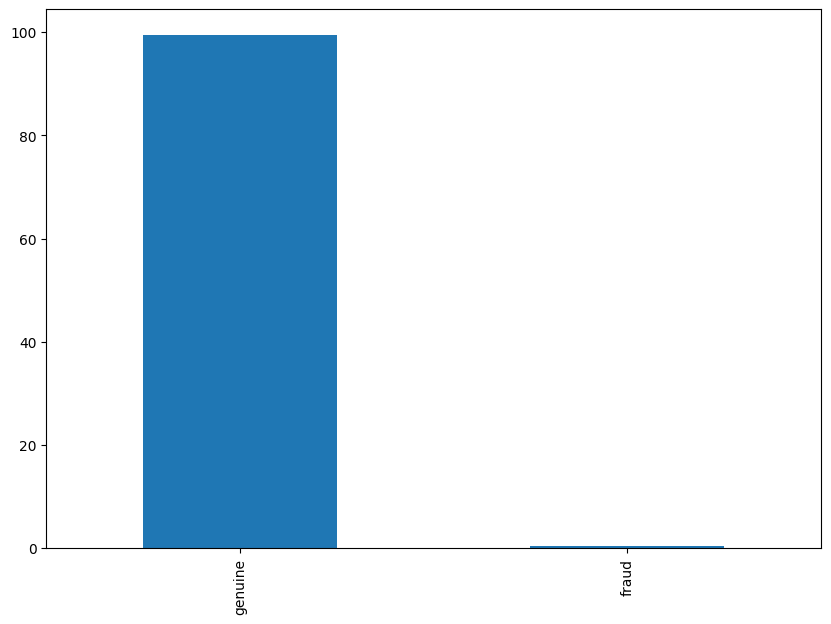

In [ ]:
a = data['is_fraud'].value_counts().rename('count') # count of classes
b = (data['is_fraud'].value_counts(normalize = True)*100).rename('distribution') # normalisation of the classes
tem = pd.concat([a,b], axis = 1)
tem.index = ['genuine','fraud']
tem['distribution'].plot(kind = 'bar', figsize = [10,7]);
tem

We found out that Dataset is **highly Imbalanced** because 99.4% of data is **Genuine** and only 0.52% of data is **Fraud**

#### **7.2. Checking Target variable Distribution by Gender**

,Genuine,Fraud
F,1009850,4899
M,832893,4752


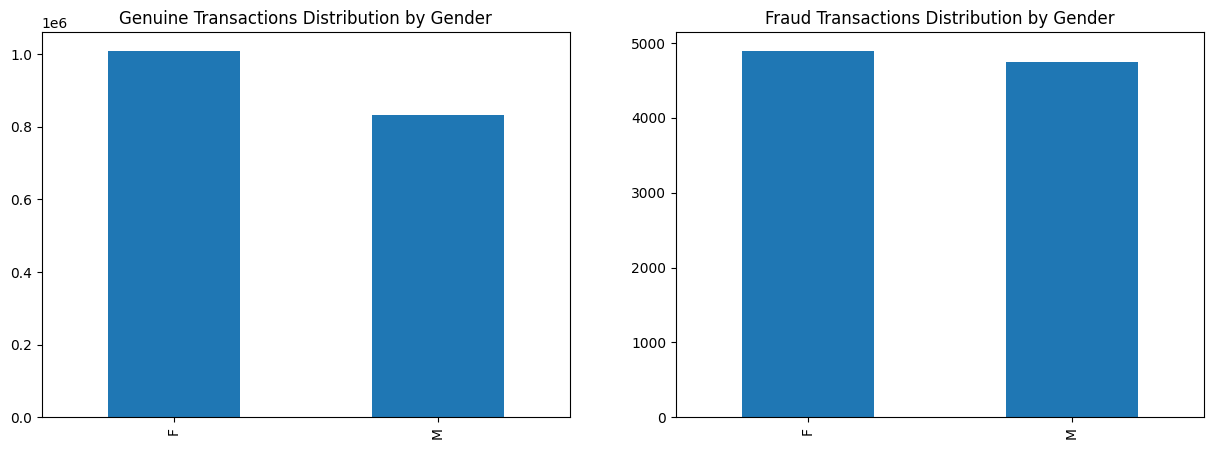

In [ ]:
non_fraud=data[data['is_fraud']==0]
fraud=data[data['is_fraud']==1]


plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
non_fraud['gender'].value_counts().plot(kind='bar')
plt.title("Genuine Transactions Distribution by Gender")

plt.subplot(1,2,2)
fraud['gender'].value_counts().plot(kind='bar')
plt.title("Fraud Transactions Distribution by Gender")

temp=pd.concat([non_fraud['gender'].value_counts().rename('Genuine'),fraud['gender'].value_counts().rename('Fraud')],axis=1)
temp

We can see that Fraudulent Transactions are **equally distributed** in **Male** and **Female** .So there is no differenece because of gender

#### **7.3. Checking Target variable Distribution by State**

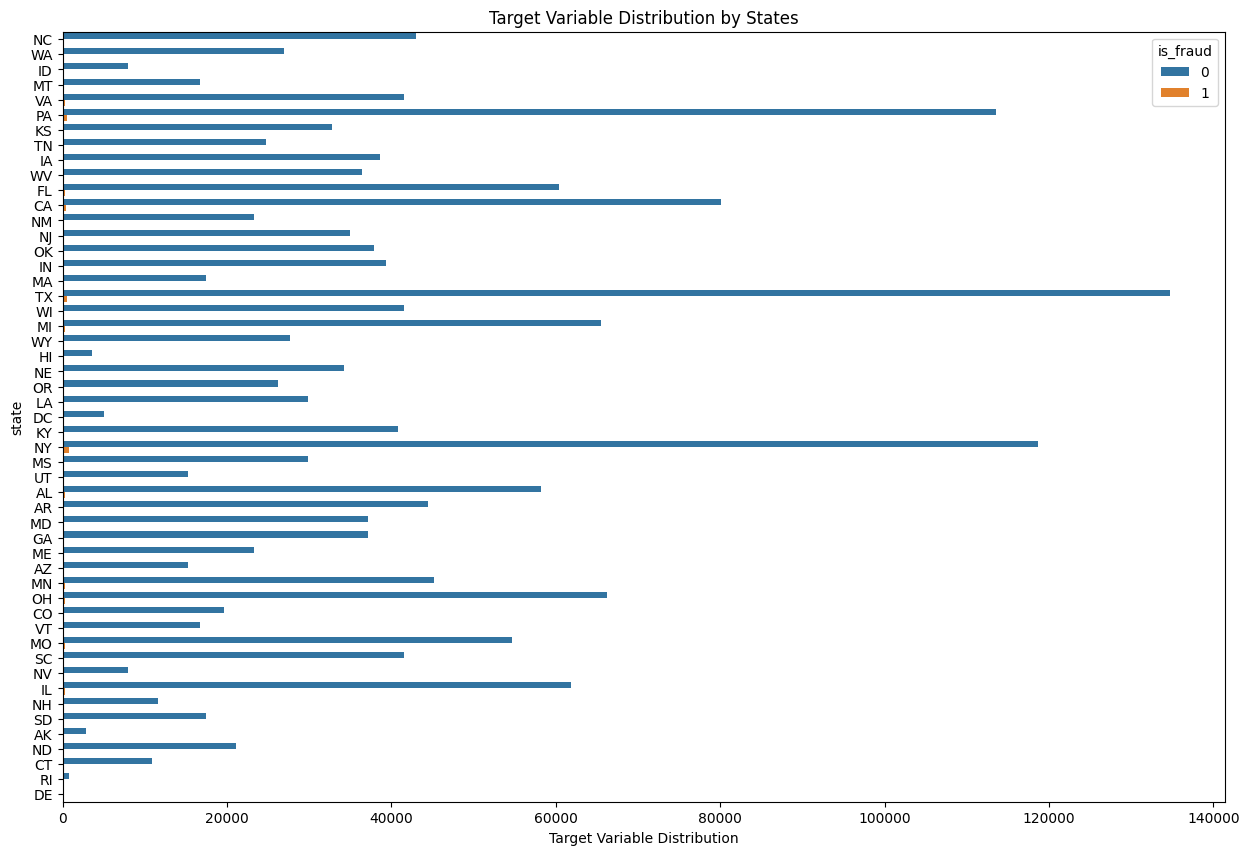

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(y='state', hue='is_fraud', data=data)
plt.title("Target Variable Distribution by States")
plt.xlabel("Target Variable Distribution")
plt.show()

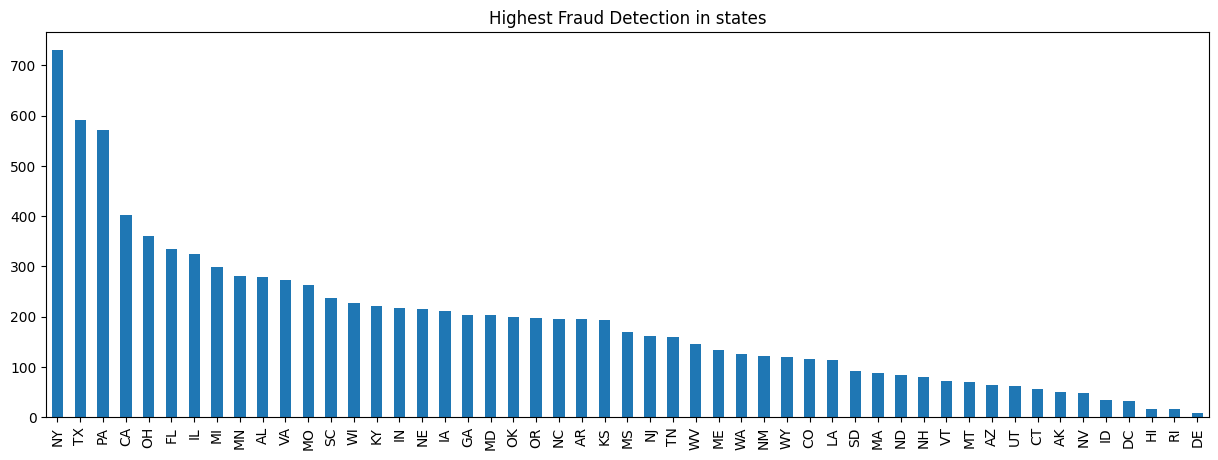

In [ ]:
data_f=data[data['is_fraud']==1]
plt.figure(figsize=(15,5))
data_f['state'].value_counts().plot(kind='bar')
plt.title("Highest Fraud Detection in states")
plt.xticks(rotation=90);

#### **7.4. Checking Target variable Distribution by Category**

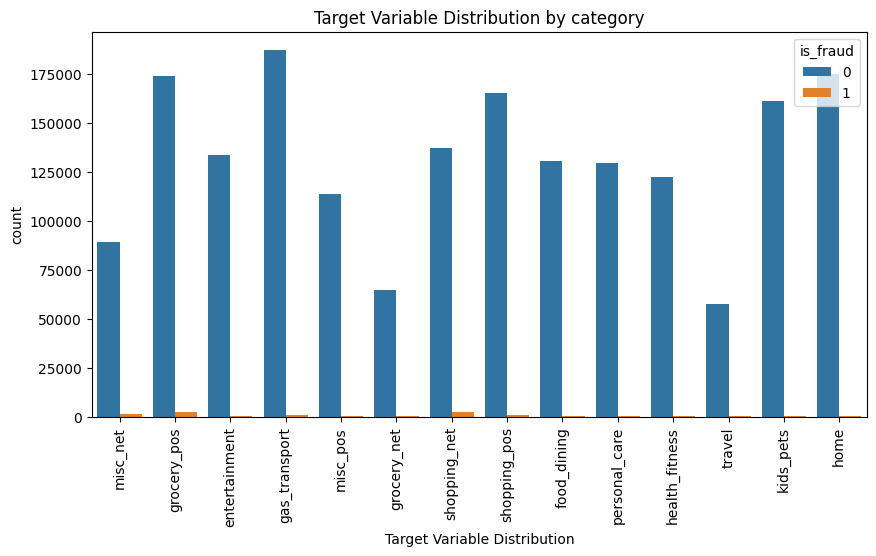

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='category', hue='is_fraud', data=data)
plt.title("Target Variable Distribution by category")
plt.xlabel("Target Variable Distribution")
plt.xticks(rotation=90)
plt.show()

grocery_pos       2228
shopping_net      2219
misc_net          1182
shopping_pos      1056
gas_transport      772
misc_pos           322
kids_pets          304
entertainment      292
personal_care      290
home               265
food_dining        205
health_fitness     185
grocery_net        175
travel             156
Name: category, dtype: int64


Text(0.5, 1.0, 'Highest Fraud Detection in Categories')

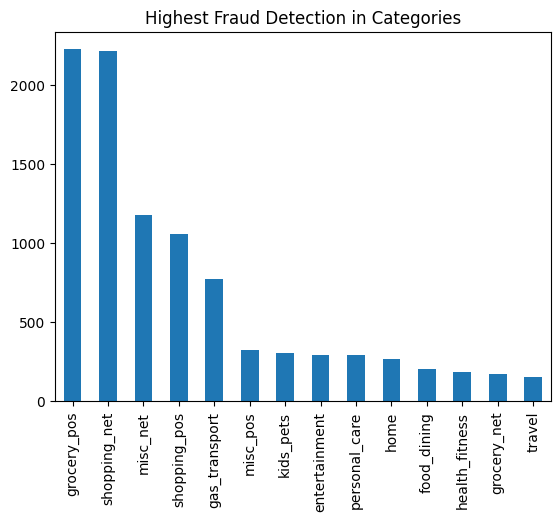

In [ ]:
data_f=data[data['is_fraud']==1]
print(data_f['category'].value_counts())
data_f['category'].value_counts().plot(kind='bar')
plt.title("Highest Fraud Detection in Categories")

#### **7.5. Checking Target variable Distribution by Age**

<Axes: xlabel='is_fraud', ylabel='age'>

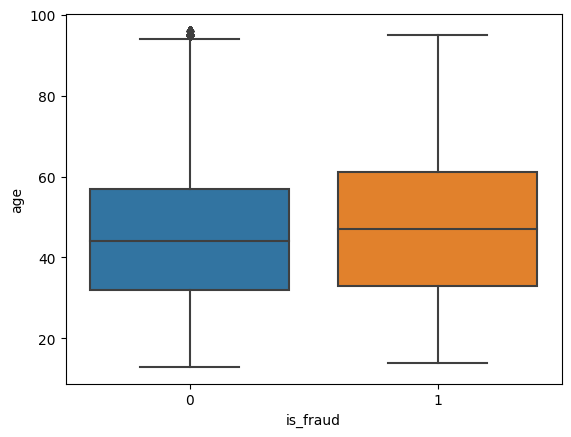

In [ ]:
data['trans_date_trans_time']=pd.to_datetime(data['trans_date_trans_time'])
data['dob']=pd.to_datetime(data['dob'])

data['age']=round((data['trans_date_trans_time']-data['dob']).astype('timedelta64[Y]'),1)
sns.boxplot(y='age',x='is_fraud',data=data)

#### **7.6. Distributions Of Feature Values**

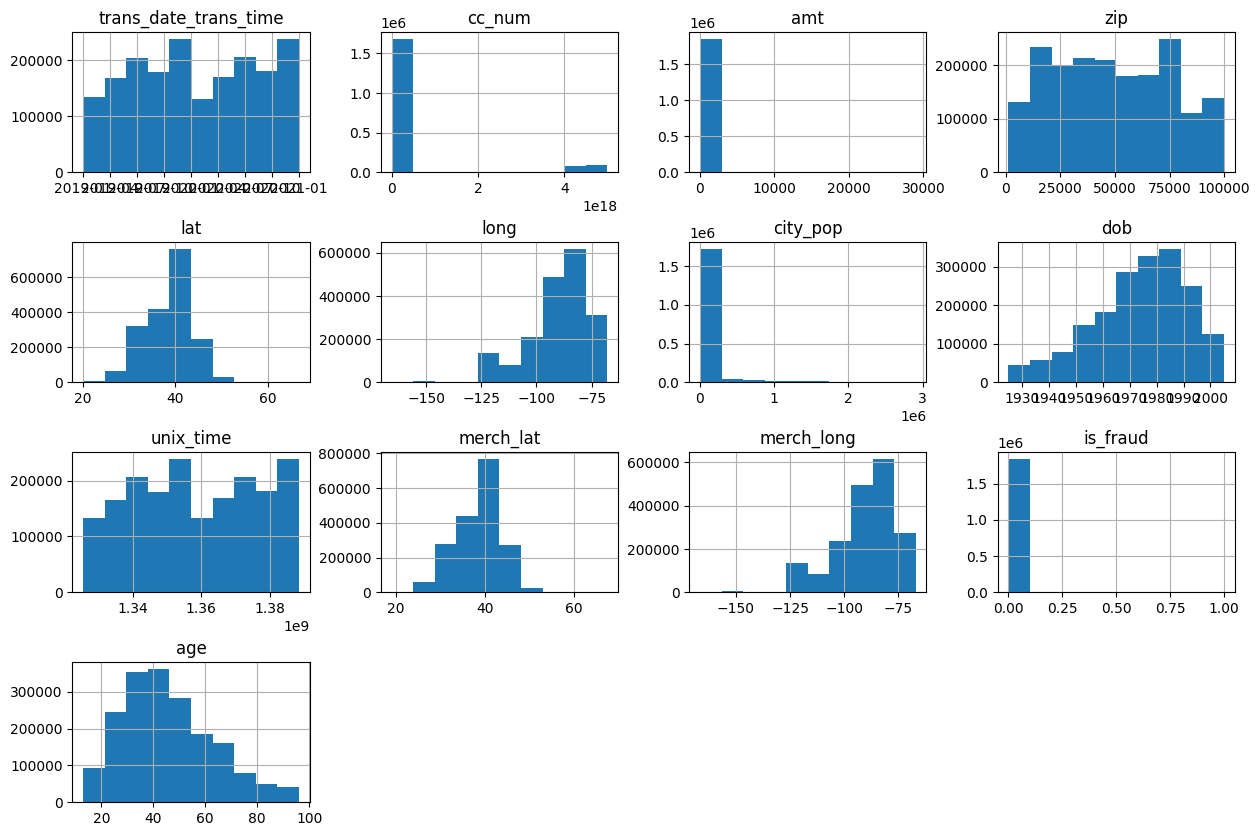

In [ ]:
data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);
#Hint: notice how the terminating ';' "swallows" some messy output and leads to a tidier notebook

<Axes: >

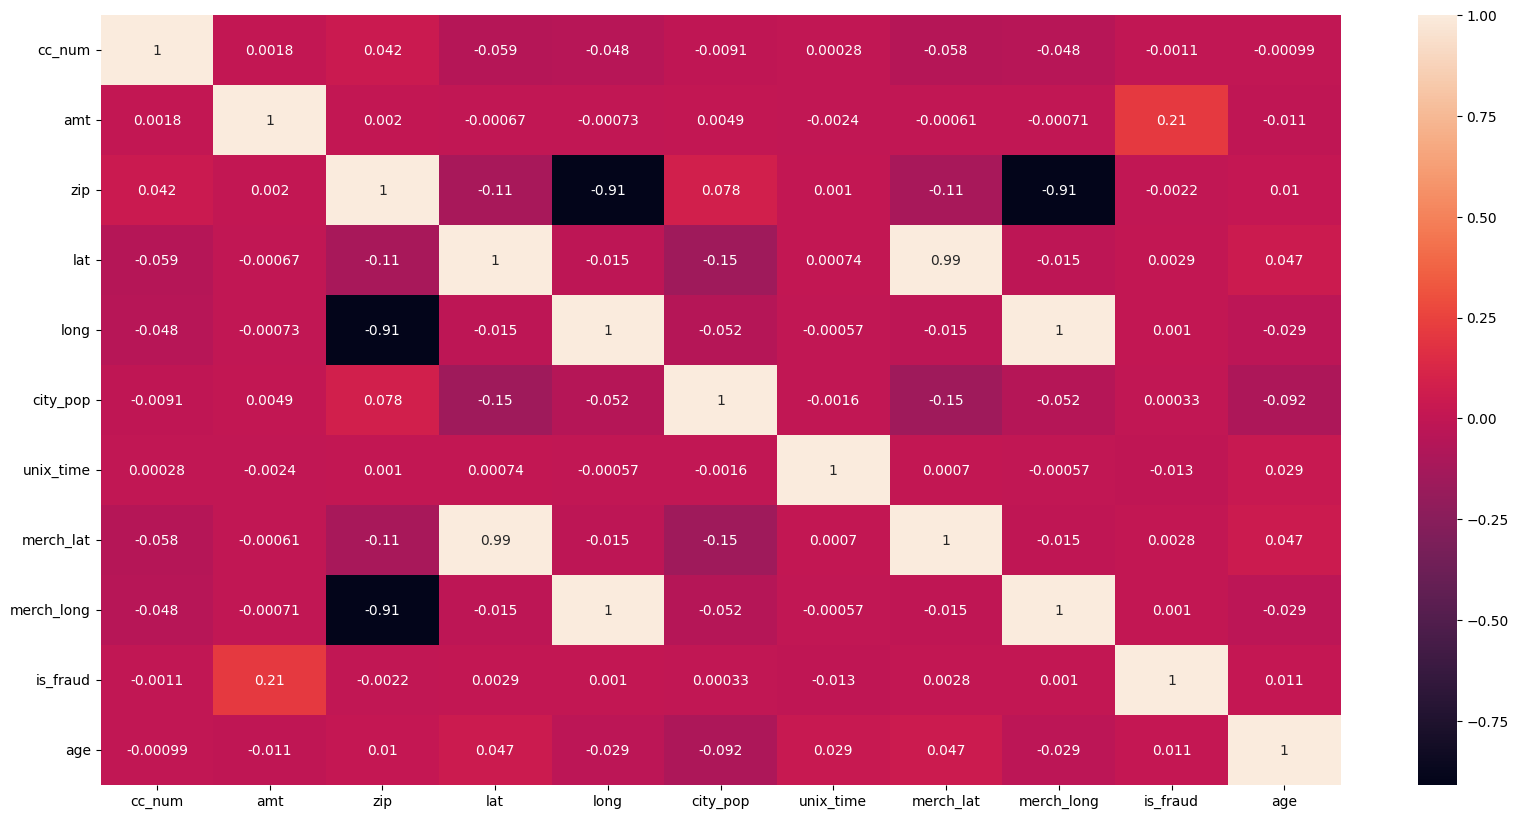

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)

#### **7.7. Distribution across "Year", "Month", "Days","Hours", "Name of the Days"**

##### **7.7.1. Yearly Trend**

In [ ]:
data['trans_year']=data['trans_date_trans_time'].dt.year
data['trans_year'].unique()

array([2019, 2020])

In [ ]:
a=data['is_fraud'].groupby(data['trans_year']).value_counts().rename("Normal Count")
b=(data['is_fraud'].groupby(data['trans_year']).value_counts(normalize=True)*100).rename("Distribution")
temp_year=pd.concat([a,b],axis=1)
temp_year

Normal Count  Distribution
trans_year is_fraud                            
2019       0               919630     99.435584
           1                 5220      0.564416
2020       0               923113     99.522287
           1                 4431      0.477713

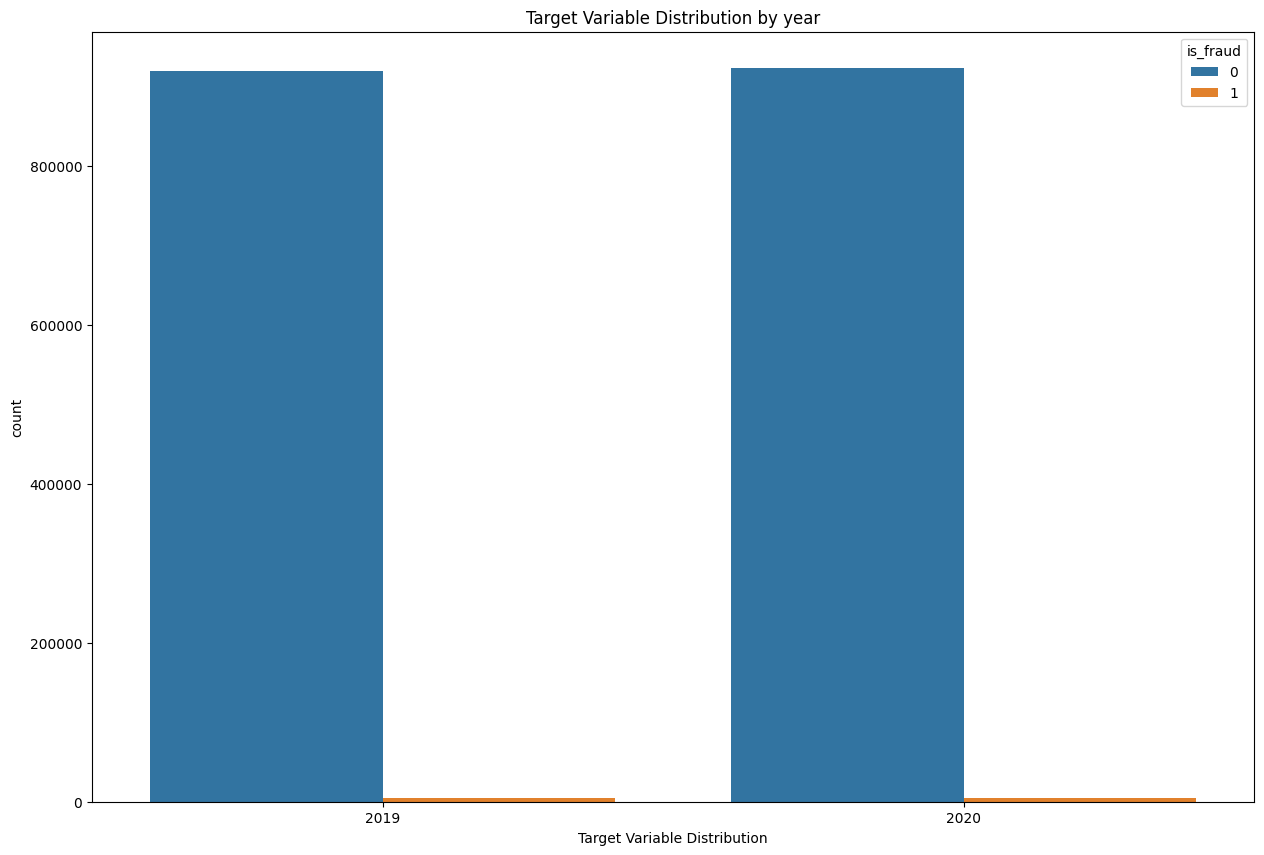

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x='trans_year', hue='is_fraud', data=data)
plt.title("Target Variable Distribution by year")
plt.xlabel("Target Variable Distribution")
plt.show()

##### **7.7.2. Monthly Trend**

In [ ]:

data['trans_month']=data['trans_date_trans_time'].dt.month
data['trans_month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
a = data['is_fraud'].groupby(data['trans_month']).value_counts().rename('Month')
b = (data['is_fraud'].groupby(data['trans_month']).value_counts(normalize = True)*100).rename('Distribution')
tem = pd.concat([a,b], axis = 1)
tem


Month  Distribution
trans_month is_fraud                      
1           0         103878     99.189321
            1            849      0.810679
2           0          96804     99.126535
            1            853      0.873465
3           0         142851     99.347655
            1            938      0.652345
4           0         134292     99.497666
            1            678      0.502334
5           0         145940     99.363404
            1            935      0.636596
6           0         173048     99.527805
            1            821      0.472195
7           0         171792     99.621906
            1            652      0.378094
8           0         175321     99.547462
            1            797      0.452538
9           0         139427     99.459286
            1            758      0.540714
10          0         137268     99.393220
            1            838      0.606780
11          0         142374     99.523264
            1            682      0.476736
12          0         279748     99.697076
            1            850      0.302924

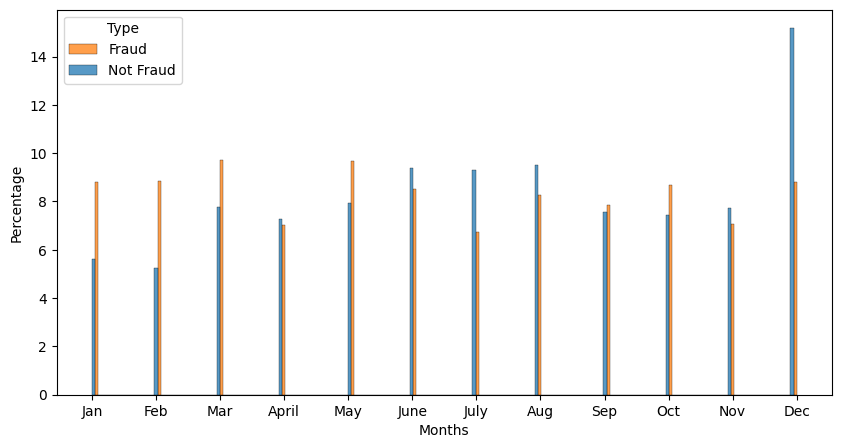

In [ ]:
plt.figure(figsize=(10,5))
ax=sns.histplot(data=data,x='trans_month',hue='is_fraud',common_norm=False, stat='percent', multiple='dodge')
plt.xticks(np.arange(1,13,1))
ax.set_xticklabels(["Jan","Feb","Mar","April","May","June","July","Aug","Sep","Oct","Nov","Dec"])
ax.set_ylabel('Percentage')
ax.set_xlabel('Months')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

##### **7.7.3. Daily Trend**

In [ ]:

data['trans_days']=data['trans_date_trans_time'].dt.day
data['trans_days'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

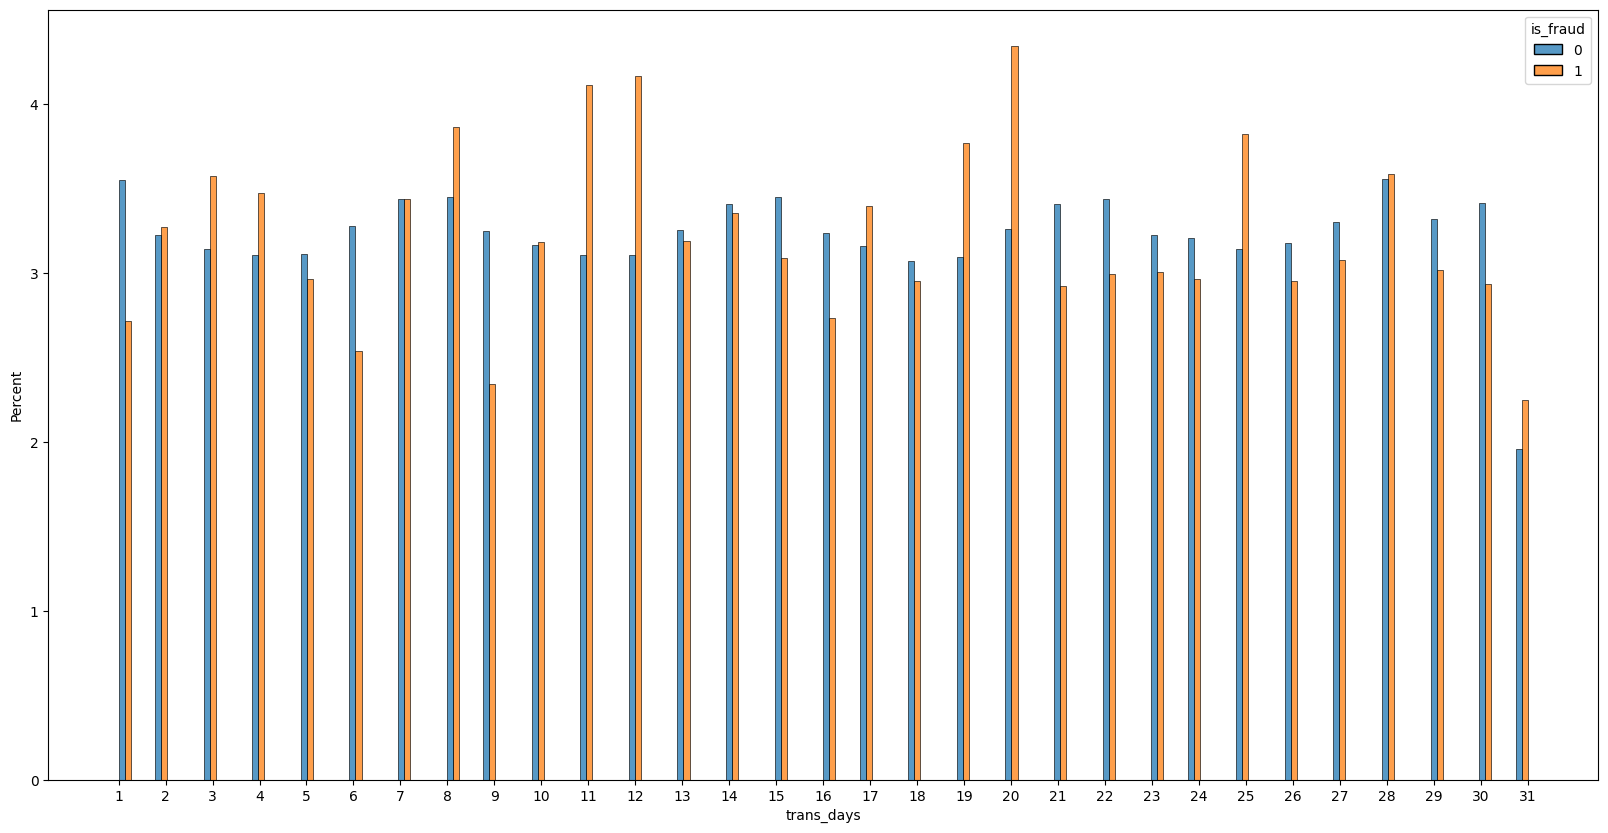

In [ ]:
plt.figure(figsize=(20,10))
ax=sns.histplot(data=data,x='trans_days',hue="is_fraud",common_norm=False,stat='percent',multiple='dodge')
plt.xticks(np.arange(1,32,1));

##### **7.7.4. Weekly Trend**

In [ ]:
data['trans_week_days']=data['trans_date_trans_time'].dt.day_name()
data['trans_week_days'].unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday'], dtype=object)

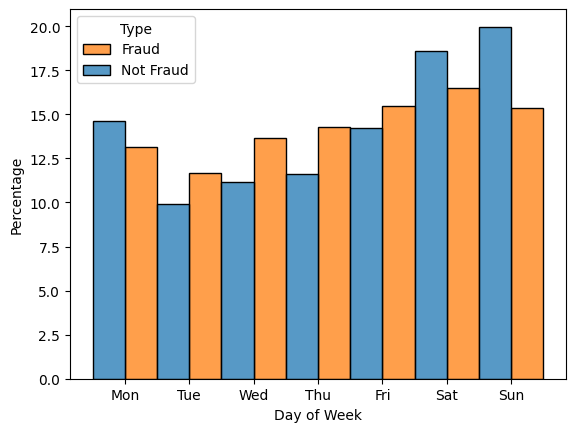

In [ ]:
ax=sns.histplot(data=data, x="trans_week_days", hue="is_fraud", common_norm=False, stat='percent', multiple='dodge')
ax.set_xticklabels(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
ax.set_ylabel('Percentage')
ax.set_xlabel('Day of Week')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

##### **7.7.5. Hourly Trend**

In [ ]:

data['trans_hour']=data['trans_date_trans_time'].dt.hour
data['trans_hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

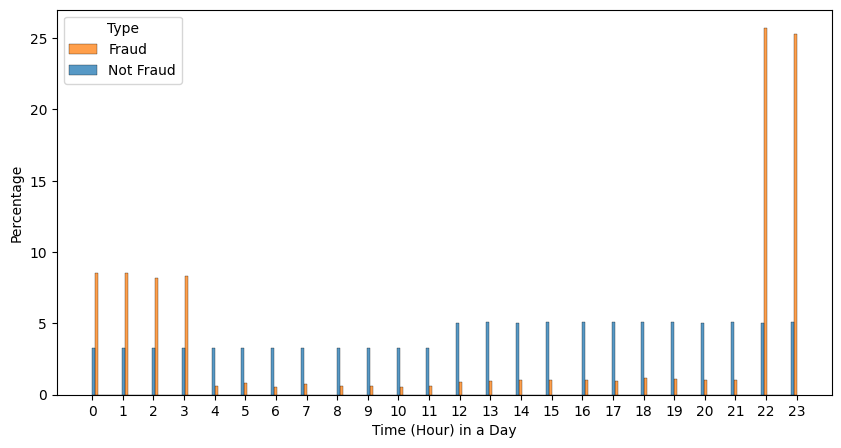

In [ ]:
plt.figure(figsize=(10,5))
ax=sns.histplot(data=data,x='trans_hour',hue='is_fraud',common_norm=False, stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Time (Hour) in a Day')
plt.xticks(np.arange(0,24,1))
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

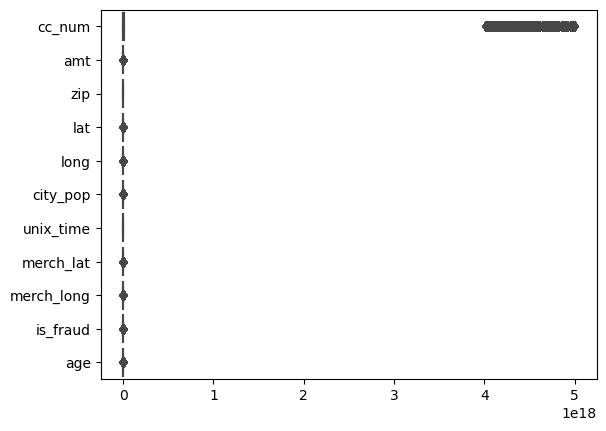

In [ ]:
sns.boxplot( data = data, orient="h")
plt.show()

### **6. Saving Data**

In [ ]:
# splitting and saving the data to the new csv files

data[data['label']=='Train'].to_csv("/content/drive/MyDrive/Colab Notebooks/clean_Train.csv")
data[data['label']=='Test'].to_csv("/content/drive/MyDrive/Colab Notebooks/clean_Test.csv"

### **Summary Statement**

1. Originally we have Two datasets **Train** and **Test** having following rows and columns.

    - Train Dataset : 1296675x23
    - Test Dataset : 555719x23

    and by combining we have **1852394** number of Rows and **23** number of columns now in the DATASET.
    and dataset ratio is
    
    -  Ratio of Train dataset :  70.0  %
    -  Ratio of Test dataset :  30.0  %    
      
    
2. We found out that Dataset is **highly Imbalanced** because 99.4% of data is **Genuine** and only 0.52% of data is **Fraud**

3. We added two columns name **label** (having the information regarding which dataset is this row belongs to)
   and **age** column.

4. Fortunately we dont have any duplicate rows and missing values in the dataset.

5. We found out that Highest Fraud detected in **grocery_pos** category

6. We figured out that Highest Fraud detected in **NewYork** state

7. We can see that Fraudulent Transactions are **equally distributed** in **Male** and **Female**

8. We also see that Mostly Frauds are detected in age range between 35-55

9. We also found out that our Target variable is **"is_fraud"**

10. In the last there are 1852394 rows and 24 columns left in the DATASET